In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [4]:
df = pd.read_csv("/kaggle/input/inflacao-brasil/inflacao.csv")

In [5]:
df.head()

,referencia,ano,mes,ano_mes,ipca_variacao,ipca_acumulado_ano,ipca_acumulado_doze_meses,ipca15_variacao,ipca15_acumulado_ano,ipca15_acumulado_doze_meses,...,ipc_fipe_acumulado_ano,incc_variacao,incc_acumulado_ano,incc_m_variacao,incc_m_acumulado_ano,selic_meta,selic_ano,juros_reais,salario_minimo,consolidado_ano
0,1980-01,1980,1,198001,6.62,6.62,0.0,0.0,0.0,0.0,...,4.48,4.70,4.70,0.0,0.0,0.0,0.0,0.0,2932.8,False
1,1980-02,1980,2,198002,4.62,11.54,0.0,0.0,0.0,0.0,...,7.83,9.53,14.23,0.0,0.0,0.0,0.0,0.0,2932.8,False
2,1980-03,1980,3,198003,6.04,18.27,0.0,0.0,0.0,0.0,...,12.17,12.80,27.03,0.0,0.0,0.0,0.0,0.0,2932.8,False
3,1980-04,1980,4,198004,5.29,24.53,0.0,0.0,0.0,0.0,...,16.10,3.13,30.16,0.0,0.0,0.0,0.0,0.0,2932.8,False
4,1980-05,1980,5,198005,5.70,31.63,0.0,0.0,0.0,0.0,...,22.62,4.86,35.02,0.0,0.0,0.0,0.0,0.0,4149.6,False


In [6]:
df.tail()

,referencia,ano,mes,ano_mes,ipca_variacao,ipca_acumulado_ano,ipca_acumulado_doze_meses,ipca15_variacao,ipca15_acumulado_ano,ipca15_acumulado_doze_meses,...,ipc_fipe_acumulado_ano,incc_variacao,incc_acumulado_ano,incc_m_variacao,incc_m_acumulado_ano,selic_meta,selic_ano,juros_reais,salario_minimo,consolidado_ano
514,2022-11,2022,11,202211,0.41,5.13,5.90,0.53,5.35,6.17,...,6.56,0.36,8.84,0.14,8.79,13.75,13.65,7.32,1212.0,False
515,2022-12,2022,12,202212,0.62,5.79,5.79,0.52,5.90,5.90,...,7.10,0.09,8.93,0.27,9.06,13.75,13.65,7.43,1212.0,True
516,2023-01,2023,1,202301,0.53,0.53,5.77,0.55,0.55,5.87,...,0.63,0.46,0.46,0.32,0.32,13.75,13.65,7.45,1302.0,False
517,2023-02,2023,2,202302,0.84,1.37,5.60,0.76,1.31,5.63,...,1.06,0.05,0.51,0.21,0.53,13.75,13.65,7.62,1302.0,False
518,2023-03,2023,3,202303,0.71,2.09,4.65,0.69,2.01,5.36,...,1.45,0.30,0.81,0.18,0.71,13.75,13.65,8.60,1302.0,False


Variação mensal do IPCA

In [7]:
meses_maior_variacao = df.loc[df['ipca_variacao'].idxmax(), 'mes']
meses_menor_variacao = df.loc[df['ipca_variacao'].idxmin(), 'mes']
ano_maior_variacao = df.loc[df['ipca_variacao'].idxmax(), 'ano']
ano_menor_variacao = df.loc[df['ipca_variacao'].idxmin(), 'ano']
print("Mês com maior variação: ", meses_maior_variacao, "De ",ano_maior_variacao)
print("Mês com menor variação: ", meses_menor_variacao,"De ",ano_menor_variacao)

Mês com maior variação:  3 De  1990
Mês com menor variação:  7 De  2022


Acumulado do IPCA no ano

In [8]:
acumulado_ano = df['ipca_acumulado_ano'].iloc[-1]
print("Acumulado do IPCA no ano: ", acumulado_ano)

Acumulado do IPCA no ano:  2.09


Acumulado do IPCA nos últimos 12 meses

In [9]:
acumulado_12_meses = df['ipca_acumulado_doze_meses'].iloc[-1]
print("Acumulado do IPCA nos últimos 12 meses: ", acumulado_12_meses)

Acumulado do IPCA nos últimos 12 meses:  4.65


Variação mensal do IPCA-15

In [10]:
meses_maior_variacao_ipca15 = df.loc[df['ipca15_variacao'].idxmax(), 'mes']
meses_menor_variacao_ipca15 = df.loc[df['ipca15_variacao'].idxmin(), 'mes']
ano_maior_variacao_ipca15 = df.loc[df['ipca15_variacao'].idxmax(), 'ano']
ano_maior_variacao_ipca15 = df.loc[df['ipca15_variacao'].idxmin(), 'ano']
print("Mês com maior variação do IPCA-15: ", meses_maior_variacao_ipca15," De ", ano_maior_variacao_ipca15)
print("Mês com menor variação do IPCA-15: ", meses_menor_variacao_ipca15,"De ",ano_maior_variacao_ipca15)

Mês com maior variação do IPCA-15:  12  De  2022
Mês com menor variação do IPCA-15:  8 De  2022


Acumulado do IPCA-15 no ano e nos últimos 12 meses

In [11]:
acumulado_ano_ipca15 = df['ipca15_acumulado_ano'].iloc[-1]
acumulado_12_meses_ipca15 = df['ipca15_acumulado_doze_meses'].iloc[-1]
print("Acumulado do IPCA-15 no ano: ", acumulado_ano_ipca15)
print("Acumulado do IPCA-15 nos últimos 12 meses: ", acumulado_12_meses_ipca15)

Acumulado do IPCA-15 no ano:  2.01
Acumulado do IPCA-15 nos últimos 12 meses:  5.36


**Análise de tendências temporais:**
Variação mensal do IPCA

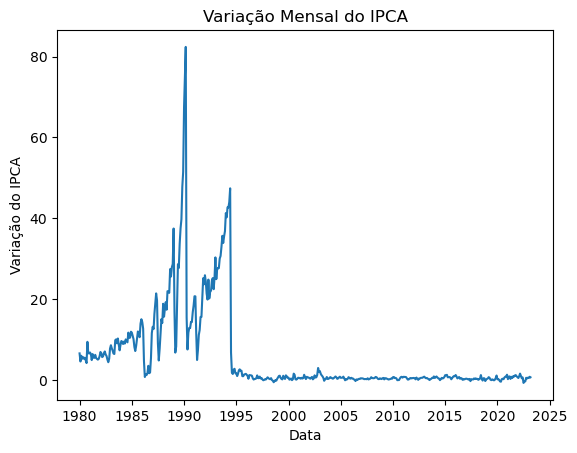

In [12]:
df['data'] = pd.to_datetime(df['ano_mes'], format='%Y%m')
plt.plot(df['data'], df['ipca_variacao'])
plt.xlabel('Data')
plt.ylabel('Variação do IPCA')
plt.title('Variação Mensal do IPCA')
plt.show()

Acumulado do IPCA no ano e nos últimos 12 meses

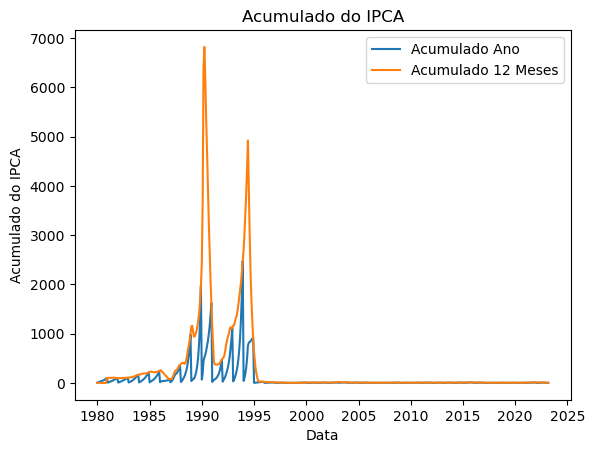

In [13]:
plt.plot(df['data'], df['ipca_acumulado_ano'], label='Acumulado Ano')
plt.plot(df['data'], df['ipca_acumulado_doze_meses'], label='Acumulado 12 Meses')
plt.xlabel('Data')
plt.ylabel('Acumulado do IPCA')
plt.title('Acumulado do IPCA')
plt.legend()
plt.show()

Variação mensal do IPCA-15

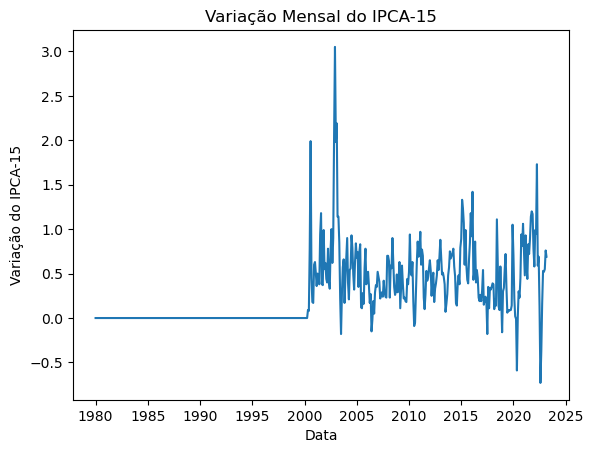

In [14]:
plt.plot(df['data'], df['ipca15_variacao'])
plt.xlabel('Data')
plt.ylabel('Variação do IPCA-15')
plt.title('Variação Mensal do IPCA-15')
plt.show()

Acumulado do IPCA-15 no ano e nos últimos 12 meses

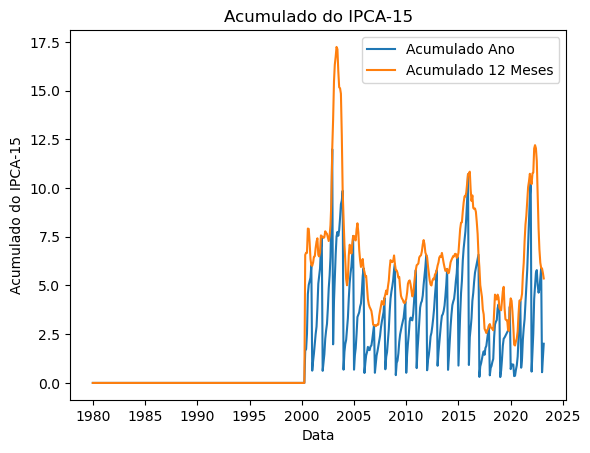

In [15]:
plt.plot(df['data'], df['ipca15_acumulado_ano'], label='Acumulado Ano')
plt.plot(df['data'], df['ipca15_acumulado_doze_meses'], label='Acumulado 12 Meses')
plt.xlabel('Data')
plt.ylabel('Acumulado do IPCA-15')
plt.title('Acumulado do IPCA-15')
plt.legend()
plt.show()

Divisão por setores

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


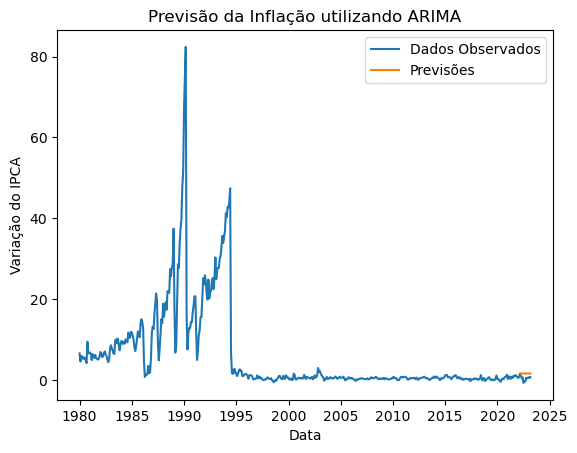

In [16]:
# Definir a coluna "ano_mes" como índice e converter para formato de data
df['ano_mes'] = pd.to_datetime(df['ano_mes'], format='%Y%m')
df.set_index('ano_mes', inplace=True)

# Separar os dados em treinamento e teste
train_data = df['ipca_variacao'].iloc[:-12]  # Dados de treinamento (todos exceto os últimos 12 meses)
test_data = df['ipca_variacao'].iloc[-12:]  # Dados de teste (últimos 12 meses)

# Ajustar o modelo ARIMA aos dados de treinamento
model = ARIMA(train_data, order=(1, 1, 1))  # Parâmetros p, d, q do modelo ARIMA
model_fit = model.fit()

# Fazer previsões para os dados de teste
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

# Plotar os resultados
plt.plot(df.index, df['ipca_variacao'], label='Dados Observados')
plt.plot(test_data.index, predictions, label='Previsões')
plt.xlabel('Data')
plt.ylabel('Variação do IPCA')
plt.title('Previsão da Inflação utilizando ARIMA')
plt.legend()
plt.show()


**Verificar se o salário mínimo acompanhou a inflação**
Foi necessário separar os dados de 10 em 10 anos

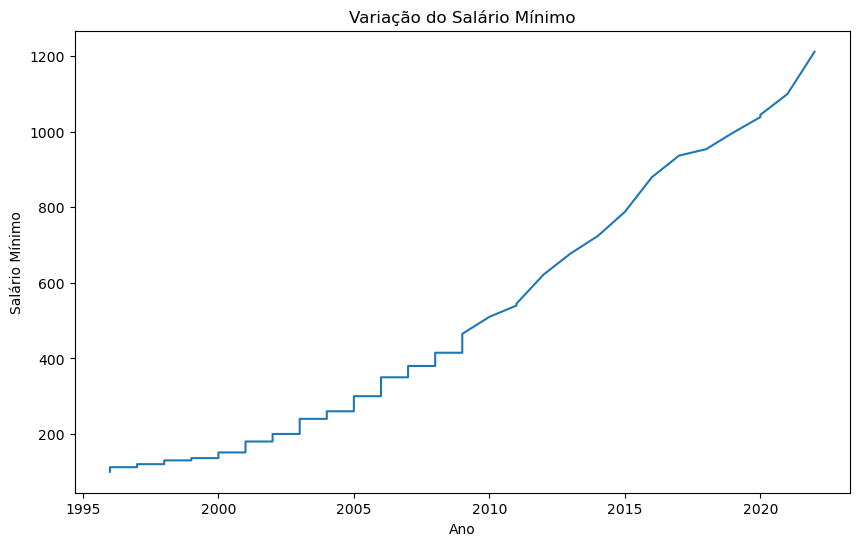

In [23]:
## Filtrar os dados a partir de 1995 até 2023
df_filtrado = df[(df['ano'] >= 1996) & (df['ano'] <= 2022)]

# Plotar o gráfico do salário mínimo
plt.figure(figsize=(10, 6))
plt.plot(df_filtrado['ano'], df_filtrado['salario_minimo'])
plt.xlabel('Ano')
plt.ylabel('Salário Mínimo')
plt.title('Variação do Salário Mínimo')
plt.show()



In [18]:
df_filtrado.head()

,referencia,ano,mes,ipca_variacao,ipca_acumulado_ano,ipca_acumulado_doze_meses,ipca15_variacao,ipca15_acumulado_ano,ipca15_acumulado_doze_meses,inpc_variacao,...,incc_variacao,incc_acumulado_ano,incc_m_variacao,incc_m_acumulado_ano,selic_meta,selic_ano,juros_reais,salario_minimo,consolidado_ano,data
ano_mes,,,,,,,,,,,,,,,,,,,,,
1995-01-01,1995-01,1995,1,1.70,1.70,631.54,0.0,0.0,0.0,1.44,...,3.50,3.50,1.37,1.37,0.0,46.25,-80.01,70.0,False,1995-01-01
1995-02-01,1995-02,1995,2,1.02,2.74,426.83,0.0,0.0,0.0,1.01,...,2.09,5.59,3.54,4.91,0.0,56.54,-70.29,70.0,False,1995-02-01
1995-03-01,1995-03,1995,3,1.55,4.33,274.78,0.0,0.0,0.0,1.62,...,3.30,8.89,2.41,7.32,0.0,57.98,-57.85,70.0,False,1995-03-01
1995-04-01,1995-04,1995,4,2.43,6.87,169.05,0.0,0.0,0.0,2.49,...,2.30,11.19,2.74,10.06,0.0,85.47,-31.06,70.0,False,1995-04-01
1995-05-01,1995-05,1995,5,2.67,9.72,91.79,0.0,0.0,0.0,2.10,...,8.77,19.96,2.43,12.49,0.0,61.05,-16.03,100.0,False,1995-05-01


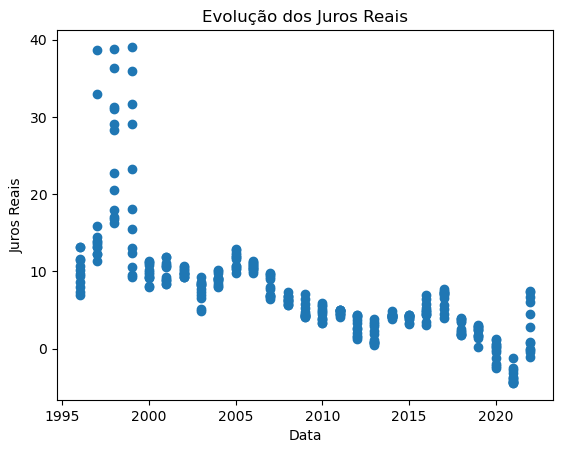

In [26]:
# Plotar da variação dos juros reais
plt.scatter(df_filtrado['ano'],df_filtrado['juros_reais'])
plt.xlabel('Data')
plt.ylabel('Juros Reais')
plt.title('Evolução dos Juros Reais')
plt.show()
